In [1]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from matplotlib.lines import Line2D

In [10]:
CurrentFixationAngles = np.genfromtxt("./CCREG/current_fixation_angleSorted.csv", delimiter=',', skip_header=1)
NextFixationAngles = np.genfromtxt("./CCREG/next_fixation_angleSorted.csv", delimiter=',', skip_header=1)
FittedValuesNext = pd.read_csv("./CCREG/fitted_values_ordered.txt", delimiter='\t', header=0)

#Convert all the angles to degrees
CurrentFixationAngles = np.rad2deg(CurrentFixationAngles)
NextFixationAngles = np.rad2deg(NextFixationAngles)
FittedValuesNext = np.rad2deg(FittedValuesNext)

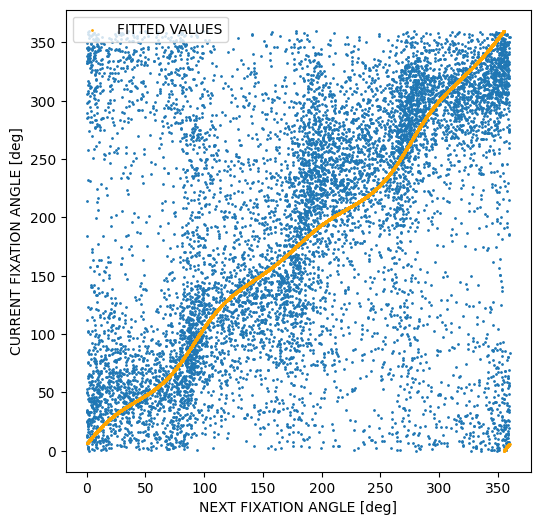

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(NextFixationAngles, CurrentFixationAngles, s=1)
plt.scatter(FittedValuesNext["Ordered_X"], FittedValuesNext['Fitted_Values'], color='orange', s=1, label = "FITTED VALUES")
plt.xlabel("NEXT FIXATION ANGLE [deg]")
plt.ylabel("CURRENT FIXATION ANGLE [deg]")
plt.legend(loc = 2)
#plt.savefig("PAPER2IMAGES/CCREG_FittedValues.png", dpi = 300)
plt.show()

In [6]:
CurrentFixationAngles = np.genfromtxt("./CCREG/current_fixation_angle.csv", delimiter=',')
NextFixationAngles = np.genfromtxt("./CCREG/next_fixation_angle.csv", delimiter=',')

RandomAnglesModel4 = np.genfromtxt("./CCREG/random_angle_model4.csv", delimiter=',')
RandomAnglesModel5 = np.genfromtxt("./CCREG/random_angle_model5.csv", delimiter=',')

#Import fitted values "./CCREG/fitted_values_ordered.txt"
FittedValuesNext = pd.read_csv("./CCREG/fitted_values_ordered.txt", delimiter='\t', header=0)
FitteValuesRandom4 = pd.read_csv("./CCREG/fitted_values_orderedR4.txt", delimiter='\t', header=0)
FitteValuesRandom5 = pd.read_csv("./CCREG/fitted_values_orderedR5.txt", delimiter='\t', header=0)

#Downsample the data to 1/3
"""NResamples = 3
CurrentFixationAngles = CurrentFixationAngles[::NResamples]
NextFixationAngles = NextFixationAngles[::NResamples]
RandomAnglesModel4 = RandomAnglesModel4[::NResamples]
RandomAnglesModel5 = RandomAnglesModel5[::NResamples]

#Digitize dependent_angle
NextFixationAnglesClass = np.digitize(NextFixationAngles, np.linspace(0, 2*np.pi, 8)) - 1
RandomAnglesModel4Class = np.digitize(RandomAnglesModel4, np.linspace(0, 2*np.pi, 8)) - 1
RandomAnglesModel5Class = np.digitize(RandomAnglesModel5, np.linspace(0, 2*np.pi, 8)) - 1

"""
#Compare the model coefficients reconstructions to the fitted values
df = pd.read_csv("./CCREG/fit.csv")
#Make the first column the index
df.set_index(df.columns[0], inplace=True)
cosY = df.iloc[0,0]+ df.iloc[1,0]*np.cos(CurrentFixationAngles)+df.iloc[2,0]*np.sin(CurrentFixationAngles)
sinY = df.iloc[0,1]+ df.iloc[1,1]*np.cos(CurrentFixationAngles)+df.iloc[2,1]*np.sin(CurrentFixationAngles)
y_pred = np.arctan2(sinY, cosY)
#If the predicted value is negative, add 2pi
y_pred = y_pred + 2*np.pi*(y_pred<0)


## ACCURACIES

In [7]:
keys = ["NextFixation", "Random4", "Random5"]
#Import the accuracy for the three models ad add them as columns in a new dataframe
df = pd.read_csv(f"./CCREG/accuracy_{keys[0]}.csv", delimiter=',', header=None)
#Name the column with the key
df.columns = [keys[0]]
#Add the other two models
for key in keys[1:]:
    df[key] = pd.read_csv(f"./CCREG/accuracy_{key}.csv", delimiter=',', header=None)


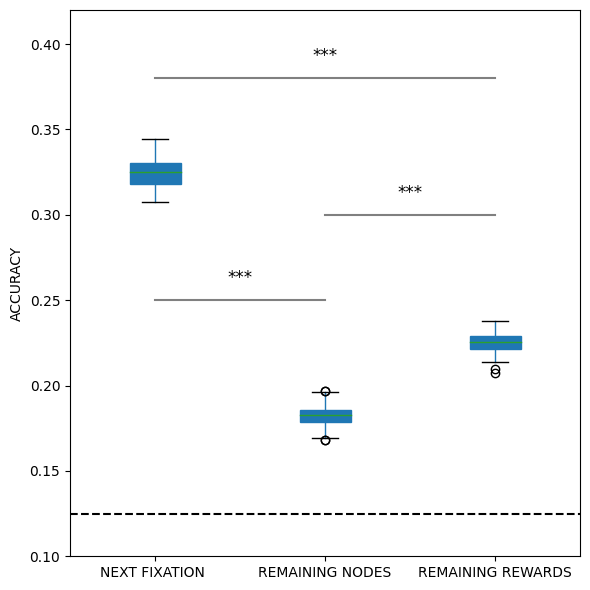

In [8]:
# Create the boxplot with patch_artist=True to fill the boxes
plt.figure(figsize=(6,6))
boxplot = df.boxplot(patch_artist=True)

# Fill the boxes with colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

# Customizations
plt.ylabel("ACCURACY")
#plt.xlabel("MODEL")
plt.xticks([1, 2, 3], ["NEXT FIXATION ", "REMAINING NODES", "REMAINING REWARDS"])
plt.axhline(y=1/8, color='k', linestyle='--')
plt.grid(False)
plt.tight_layout()
# Draw A BRACKET ABOVE THE BOXES
# Draw a segment
plt.plot([1,2], [0.25, 0.25], color='grey')
plt.plot([2,3], [0.3, 0.3], color='grey')
plt.plot([1,3], [0.38, 0.38], color='grey')
# Draw stars
plt.text(1.5, 0.26, "***", fontsize=12, ha='center')
plt.text(2.5, 0.31, "***", fontsize=12, ha='center')
plt.text(2, 0.39, "***", fontsize=12, ha='center')
plt.ylim(0.1, 0.42)

# Save the plot
#plt.savefig("./CCREG/CCREG_Accuracy.png", dpi=300)
#plt.savefig("/Users/Mattia/Desktop/TesiDottorato/figures2/CCREG_Accuracy.png", dpi=300)
plt.show()

In [8]:
df.mean()

NextFixation    0.325000
Random4         0.182557
Random5         0.225332
dtype: float64

In [16]:
df.std()

NextFixation    0.007994
Random4         0.005527
Random5         0.005786
dtype: float64

In [13]:
#Make a one-sampled one tail t-test for each model with the null hypothesis that the accuracy is 1/8
from scipy.stats import ttest_1samp
for key in keys:
    t_stat, p_val = ttest_1samp(df[key], 1/8)
    print(f"Model {key} p-value: {p_val}")
    

Model NextFixation p-value: 1.5917926549655644e-210
Model Random4 p-value: 4.8224413743121406e-154
Model Random5 p-value: 7.446698774675794e-187


In [10]:
1/8

0.125

## FIGURE 4

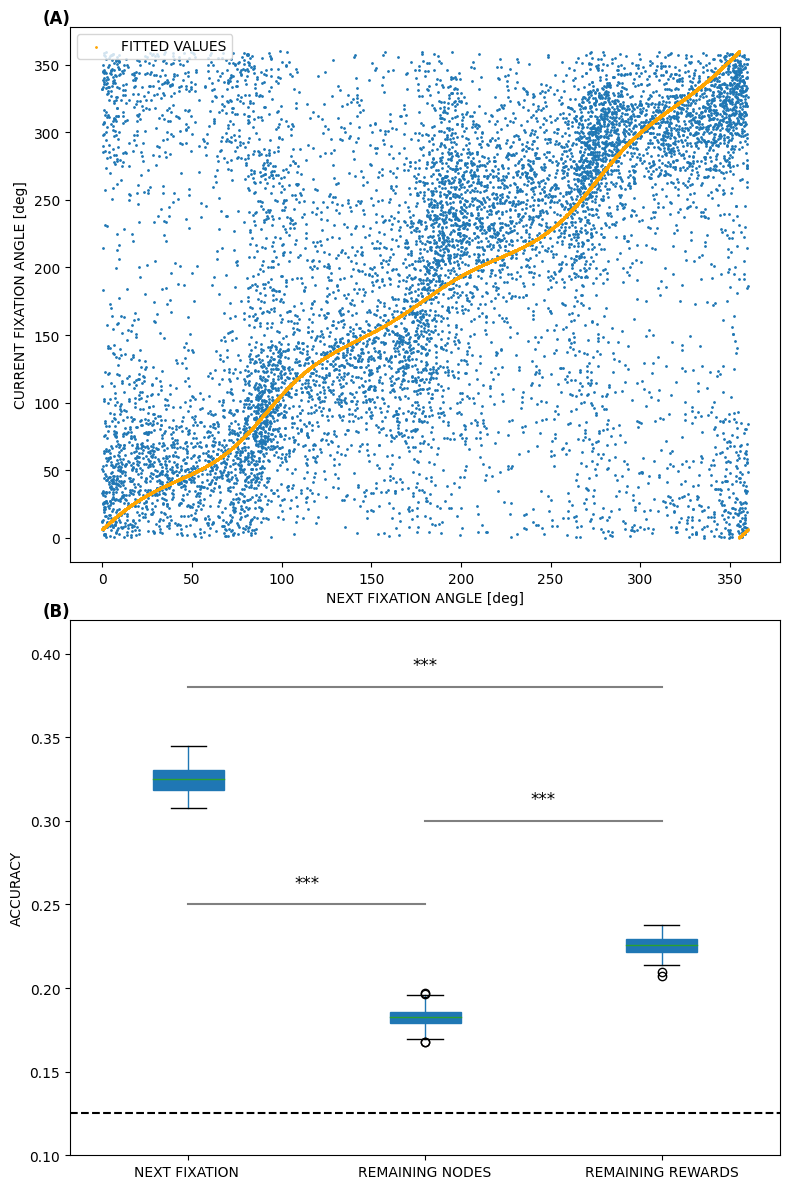

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(8,12))
plt.sca(axs[0])
plt.scatter(NextFixationAngles, CurrentFixationAngles, s=1)
plt.scatter(FittedValuesNext["Ordered_X"], FittedValuesNext['Fitted_Values'], color='orange', s=1, label = "FITTED VALUES")
plt.xlabel("NEXT FIXATION ANGLE [deg]")
plt.ylabel("CURRENT FIXATION ANGLE [deg]")
plt.legend(loc = 2)
plt.annotate("(A)", xy=(0, 1), xycoords='axes fraction', fontsize=12,
                horizontalalignment='right', verticalalignment='bottom', fontweight='bold')



plt.sca(axs[1])
boxplot = df.boxplot(patch_artist=True)
# Fill the boxes with colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)
# Customizations
plt.ylabel("ACCURACY")
#plt.xlabel("MODEL")
plt.xticks([1, 2, 3], ["NEXT FIXATION ", "REMAINING NODES", "REMAINING REWARDS"])
plt.axhline(y=1/8, color='k', linestyle='--')
plt.grid(False)
plt.tight_layout()
# Draw A BRACKET ABOVE THE BOXES
# Draw a segment
plt.plot([1,2], [0.25, 0.25], color='grey')
plt.plot([2,3], [0.3, 0.3], color='grey')
plt.plot([1,3], [0.38, 0.38], color='grey')
# Draw stars
plt.text(1.5, 0.26, "***", fontsize=12, ha='center')
plt.text(2.5, 0.31, "***", fontsize=12, ha='center')
plt.text(2, 0.39, "***", fontsize=12, ha='center')
plt.ylim(0.1, 0.42)
#Annotate a letter top left subplot
plt.annotate("(B)", xy=(0, 1), xycoords='axes fraction', fontsize=12,
                horizontalalignment='right', verticalalignment='bottom', fontweight='bold')
# Save the plot
plt.savefig("./CCREG/FIGURE_4PROVA.png", dpi=300, bbox_inches='tight')
#plt.savefig("/Users/Mattia/Desktop/TesiDottorato/figures2/CCREG_Accuracy.png", dpi=300)
plt.show()